In [51]:
import cv2
import numpy as np
import sys


## Problema 1, Funcion para obtener imagen con un solo color

In [39]:
#orden GBR
def transformacolor(imgstr, color):

    img = cv2.imread(imgstr)
    
    alto= img.shape[0]
    ancho = img.shape[1]
    canales = img.shape[2]
    out = np.zeros((alto,ancho,3)) 

    for i in range(alto):
        for j in range(ancho):
            pixel = img[i,j]
            azul = pixel[0]
            verde = pixel[1]
            rojo = pixel[2]
            if color == 1:
                out[i,j] = [azul,0,0]
            if color == 2:
                out[i,j] = [0,verde,0]
            if color == 3:
                out[i,j] = [0,0,rojo]    
            if color == 10:
                out[i,j] = [0,verde,rojo]
            if color == 20:
                out[i,j] = [azul,verde,0]    
            if color == 30:
                out[i,j] = [azul,0,rojo]

                
    cv2.imwrite(".\problema1\salida-rojo.jpg",out)
    saved = cv2.imread('.\problema1\salida-rojo.jpg')
    cv2.imshow('Imagen2',saved)
    
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    sys.exit()

transformacolor('.\problema1\Palacio_Nacional.jpg',3)

SystemExit: 

## Problema 2

In [53]:
#cargo las imagenes

img1 = cv2.imread(".\problema2\imagen2\imagen2_salida_gray_azul.jpg")
img2 = cv2.imread(".\problema2\imagen2\imagen2_salida_gray_rojo.jpg")
img3 = cv2.imread(".\problema2\imagen2\imagen2_salida_gray_verde.jpg")

alto= img1.shape[0]
ancho = img1.shape[1]
out = np.zeros((alto,ancho,3))

for i in range(alto):
    for j in range(ancho):
        azul = img1[i,j][0]
        rojo = img2[i,j][2]
        verde = img3[i,j][1]
        out[i,j] = [azul,verde,rojo]
        
cv2.imwrite(".\problema2\salida-completa2.jpg",out)
saved = cv2.imread('.\problema2\salida-completa2.jpg')
cv2.imshow('Imagen completa',saved)
    
cv2.waitKey(0)
cv2.destroyAllWindows()
sys.exit()

SystemExit: 

## Problema 3

In [66]:

#cargo las imagenes

img1 = cv2.imread(".\problema3\palacio_nacional.jpg")


alto= img1.shape[0]
ancho = img1.shape[1]
out = np.zeros((alto,ancho,3))

for i in range(alto):
    for j in range(ancho):
        azul = img1[i,j][0]
        rojo = img1[i,j][2]
        verde = img1[i,j][1]
        out1[i,j] = azul
        out2[i,j] = rojo
        out3[i,j] = verde
        
cv2.imwrite(".\problema3\salida_azul.jpg",out1)
cv2.imwrite(".\problema3\salida_rojo.jpg",out2)
cv2.imwrite(".\problema3\salida_verde.jpg",out3)
#saved = cv2.imread('.\problema3\salida.jpg')
#cv2.imshow('Imagen completa',saved)
    
cv2.waitKey(0)
cv2.destroyAllWindows()
sys.exit()

SystemExit: 

## Problema 4

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\histogram.cpp:1203: error: (-215:Assertion failed) csz == 0 || csz == dims in function 'cv::calcHist'


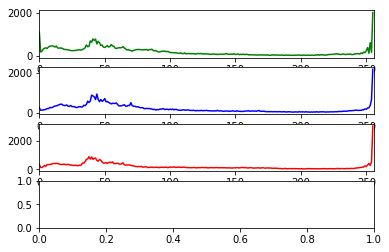

In [94]:
from matplotlib import pyplot as plt

#orden GBR
def histograma(imgstr):

    img = cv2.imread(imgstr)
    alto= img.shape[0]
    ancho = img.shape[1]
    canales = img.shape[2]
    gris = np.zeros((alto,ancho,3)) 
    
    plt.subplot(4, 1,1)
    #grafica histograma para color green
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist, color='g')
    plt.xlim([0, 256])
    
    plt.subplot(4, 1,2)
    #grafica histograma para color blue
    hist = cv2.calcHist([img], [1], None, [256], [0, 256])
    plt.plot(hist, color='b')
    plt.xlim([0, 256])
    
    plt.subplot(4, 1,3)
     #grafica histograma para color red
    hist = cv2.calcHist([img], [2], None, [256], [0, 256])
    plt.plot(hist, color='r')
    plt.xlim([0, 256])
    
    for i in range(alto):
        for j in range(ancho):
            pixel = img[i,j]
            grisAritmetico = int(int(pixel[0]) + int(pixel[1]) + int(pixel[2])/3)
            gris[i,j] = grisAritmetico

    plt.subplot(4, 1,4)
     #grafica histograma para la escala de grises aritmetico, con sus 3 dimensiones
    hist = cv2.calcHist([gris], [0,1,2], None, [256], [0, 256])
    plt.plot(hist, color='g')
    plt.xlim([0, 256])
    
    cv2.imwrite(".\problema4\salida.jpg",gris)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    sys.exit()

histograma('.\problema4\lasexta.jpg')

## Problema 5  promedio ponderado por color

### Segun lo que investigue la documentacion de la funcin cv2.cvtColor lo hace con la siguiente formula
### Y = 0.299 R + 0.587 G + 0.114 B
### hare la misma funcion de escala de gris aritmetica pero ahora le colocare los pesos segun la formula


In [96]:
#cargo las imagenes
## CV2 order BGR (blue, green, red)
img1 = cv2.imread(".\problema5\lasexta.jpg")

gris = np.zeros((alto,ancho,3)) 
alto= img1.shape[0]
ancho = img1.shape[1]
out = np.zeros((alto,ancho,3))

for i in range(alto):
    for j in range(ancho):
        pixel = img[i,j]
        grisponderado = int(int(pixel[0]*0.11) + int(pixel[1]*0.587) + int(pixel[2]*.299)/3)
        gris[i,j] = grisponderado
        
cv2.imwrite(".\problema5\salida-lasexta.jpg",gris)
saved = cv2.imread('.\problema5\salida-lasexta.jpg')
cv2.imshow('Imagen completa',saved)
    
cv2.waitKey(0)
cv2.destroyAllWindows()
sys.exit()

SystemExit: 